# 3.1 Perceptron Learning Algorithm
Alireza Habibzadeh\
Student number: `99109393`

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Dataset.csv')

# Remove rows with zero BMI, Glucose, or BloodPressure
data = data[(data['BMI'] != 0) & (data['Glucose'] != 0) & (data['BloodPressure'] != 0)]

# Shuffle the data
data = data.sample(frac=1)

features = data.iloc[:, :-1]
outcome = data['Outcome'].map({True: 1, False: -1})

# Normalize the features
features = (features - features.min()) / (features.max() - features.min())
features['Bias'] = 1

# Split the data into training (85%) and test (15%) sets
train_size = int(0.85 * len(data))

train_X = features.iloc[:train_size].values
train_y = outcome.iloc[:train_size].values
test_X = features.iloc[train_size:].values
test_y = outcome.iloc[train_size:].values

In [33]:
def accuracy(X, y, weights):
    misclassified = np.sum(np.dot(X, weights) * y <= 0)
    return 1 - (misclassified / len(y))

In [34]:
def train_perceptron(train_X, train_y, test_X, test_y, learning_rate=1, max_epochs=2000):
    weights = np.zeros(np.shape(train_X)[1])
    accuracy_history_train = []
    accuracy_history_test = []
    best_weights = None
    best_accuracy = 0
    steps = 0
    reached_goal = False

    for epoch in range(max_epochs):
        for x, y in zip(train_X, train_y):
            # Update weights
            if np.dot(weights, x) * y <= 0:
                steps += 1
                weights += learning_rate * y * x

        # Training accuracy
        accuracy_history_train.append(accuracy(train_X, train_y, weights))

        # Test accuracy
        accuracy_test = accuracy(test_X, test_y, weights)
        accuracy_history_test.append(accuracy_test)
        
        # Report when 70% accuracy on test data is reached
        if not reached_goal and accuracy_test >= 0.7:
            print(f'Reached 70% accuracy on test data with {steps} steps.')
            reached_goal = True
            
        # Save the best weights
        if accuracy_test > best_accuracy:
            best_accuracy = accuracy_test
            best_weights = np.copy(weights)
            print(f'New best test accuracy: {best_accuracy:.2%} at epoch {epoch}')

    return accuracy_history_train, accuracy_history_test, best_weights

In [35]:
accuracy_history_train, accuracy_history_test, best_weights = train_perceptron(train_X, train_y, test_X, test_y)

Reached 70% accuracy on test data with 210 steps.
New best test accuracy: 77.06% at epoch 0
New best test accuracy: 77.98% at epoch 5
New best test accuracy: 78.90% at epoch 26
New best test accuracy: 79.82% at epoch 95
New best test accuracy: 80.73% at epoch 465
New best test accuracy: 81.65% at epoch 1369


Testing weights...
Accuracy on training data: 78.37%
Accuracy on test data: 81.65%


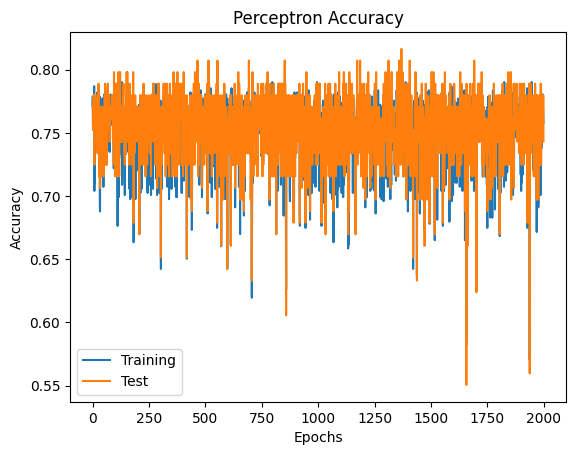

In [36]:
print('Testing weights...')
print(f'Accuracy on training data: {accuracy(train_X, train_y, best_weights) * 100:.2f}%')
print(f'Accuracy on test data: {accuracy(test_X, test_y, best_weights) * 100:.2f}%')

# Plotting the accuracy history
plt.plot(accuracy_history_train, label='Training')
plt.plot(accuracy_history_test, label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Perceptron Accuracy')
plt.show()